## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k, replacement=False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=replacement)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[19, 66, 71],
       [22, 70, 73],
       [15, 18, 28],
       [13, 55, 93],
       [16, 31, 80],
       [69, 82, 97]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([19, 66, 71]), array([22, 70, 73]))

The lowest card in the game is

In [5]:
np.min(cards)

13

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

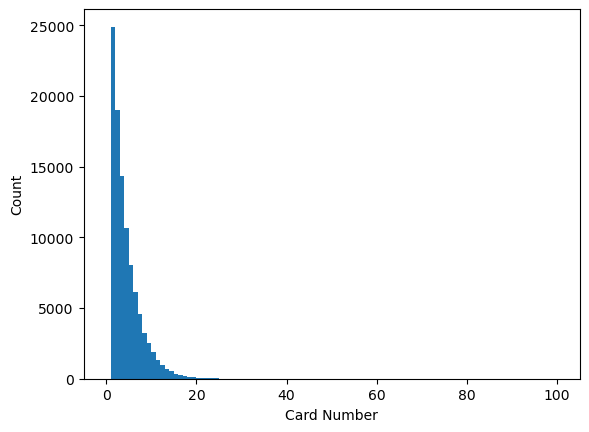

In [7]:
# To Do cell
N = 100
n = 5
k = 5

lowest = []

for i in range(0,100000):
    cards = sample_cards(N, n, k)
    lowest.append(np.min(cards))
    
plt.hist(lowest,bins=range(0,N+1))
plt.xlabel("Card Number")
plt.ylabel("Count")
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, find the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

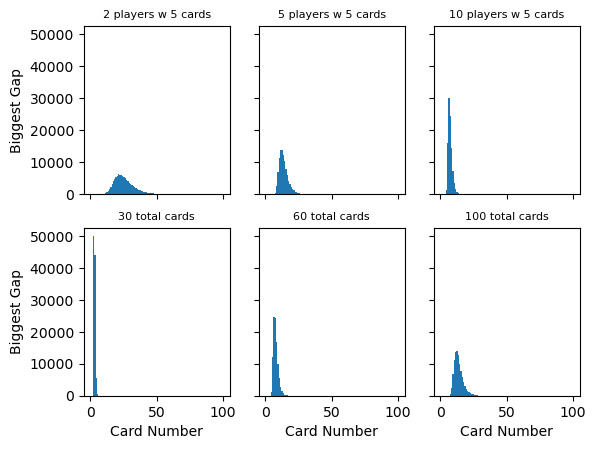

In [8]:
# To Do cell

def biggest_gap_all(cards):
    cards = cards.flatten()
    cards.sort()

    max_diff = 0

    for i in range(0,len(cards)-1):
        diff = cards[i+1] - cards[i]
        if diff > max_diff: 
            max_diff = diff
    return max_diff

fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True,sharey=True)

# Trying different values of N and k
axs[0,0].hist([biggest_gap_all(sample_cards(100,5,2)) for i in range(0,100000)],bins=range(0,N+1))
axs[0,0].set_title("2 players w 5 cards",fontsize=8)

axs[0,1].hist([biggest_gap_all(sample_cards(100,5,5)) for i in range(0,100000)],bins=range(0,N+1))
axs[0,1].set_title("5 players w 5 cards",fontsize=8)

axs[0,2].hist([biggest_gap_all(sample_cards(100,5,10)) for i in range(0,100000)],bins=range(0,N+1))
axs[0,2].set_title("10 players w 5 cards",fontsize=8)

axs[1,0].hist([biggest_gap_all(sample_cards(30,5,5)) for i in range(0,100000)],bins=range(0,N+1))
axs[1,0].set_title("30 total cards",fontsize=8)

axs[1,1].hist([biggest_gap_all(sample_cards(60,5,5)) for i in range(0,100000)],bins=range(0,N+1))
axs[1,1].set_title("60 total cards",fontsize=8)

axs[1,2].hist([biggest_gap_all(sample_cards(100,5,5)) for i in range(0,100000)],bins=range(0,N+1))
axs[1,2].set_title("100 total cards",fontsize=8)

for ax in axs.flat:
    ax.set(xlabel='Card Number', ylabel='Biggest Gap')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

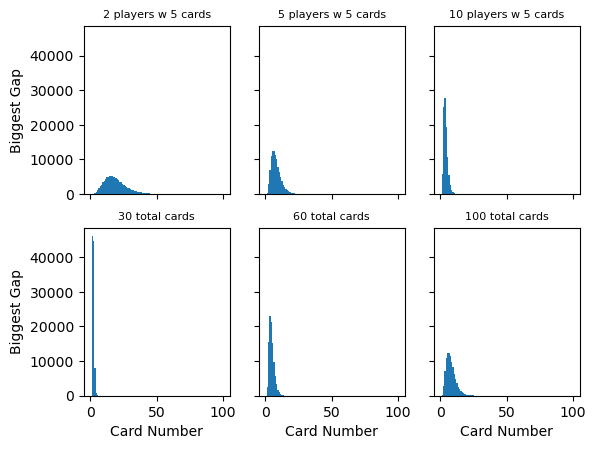

In [9]:
def biggest_gap_between(cards,k):
    cards_all = cards.flatten()
    cards_all.sort()
    
    max_diff = 0

    for i in range(0,len(cards)-1):
        diff = cards_all[i+1] - cards_all[i]
        #Checking not from same person
        if diff > max_diff:
            for j in range(0,k):
                if (cards_all[i+1] in cards[j]) and (cards_all[i] in cards[j]):
                    continue
        if diff > max_diff: 
            max_diff = diff
    return max_diff


fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True,sharey=True)

# Trying different values of N and k
axs[0,0].hist([biggest_gap_between(sample_cards(100,5,2),5) for i in range(0,100000)],bins=range(0,N+1))
axs[0,0].set_title("2 players w 5 cards",fontsize=8)

axs[0,1].hist([biggest_gap_between(sample_cards(100,5,5),5) for i in range(0,100000)],bins=range(0,N+1))
axs[0,1].set_title("5 players w 5 cards",fontsize=8)

axs[0,2].hist([biggest_gap_between(sample_cards(100,5,10),5) for i in range(0,100000)],bins=range(0,N+1))
axs[0,2].set_title("10 players w 5 cards",fontsize=8)

axs[1,0].hist([biggest_gap_between(sample_cards(30,5,5),5) for i in range(0,100000)],bins=range(0,N+1))
axs[1,0].set_title("30 total cards",fontsize=8)

axs[1,1].hist([biggest_gap_between(sample_cards(60,5,5),5) for i in range(0,100000)],bins=range(0,N+1))
axs[1,1].set_title("60 total cards",fontsize=8)

axs[1,2].hist([biggest_gap_between(sample_cards(100,5,5),5) for i in range(0,100000)],bins=range(0,N+1))
axs[1,2].set_title("100 total cards",fontsize=8)

for ax in axs.flat:
    ax.set(xlabel='Card Number', ylabel='Biggest Gap')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

**The difference between these two is largest when there are less players or more cards (see visual analysis below)**

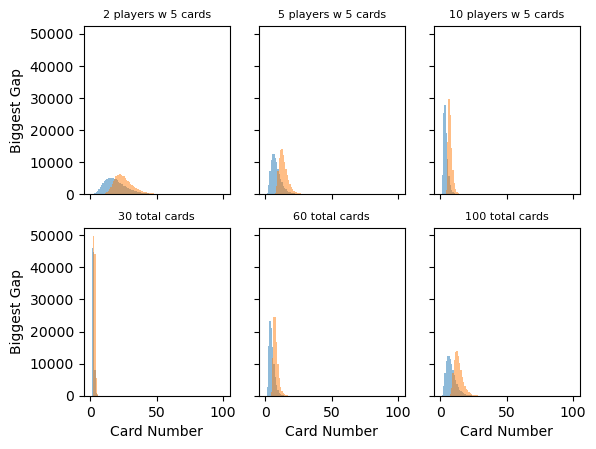

In [10]:
# Code to compare nummber of cards and number of players
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True,sharey=True)

# Trying different values of N and k
axs[0,0].hist([biggest_gap_between(sample_cards(100,5,2),5) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[0,0].hist([biggest_gap_all(sample_cards(100,5,2)) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[0,0].set_title("2 players w 5 cards",fontsize=8)

axs[0,1].hist([biggest_gap_between(sample_cards(100,5,5),5) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[0,1].hist([biggest_gap_all(sample_cards(100,5,5)) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[0,1].set_title("5 players w 5 cards",fontsize=8)

axs[0,2].hist([biggest_gap_between(sample_cards(100,5,10),5) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[0,2].hist([biggest_gap_all(sample_cards(100,5,10)) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[0,2].set_title("10 players w 5 cards",fontsize=8)

axs[1,0].hist([biggest_gap_between(sample_cards(30,5,5),5) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[1,0].hist([biggest_gap_all(sample_cards(30,5,5)) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[1,0].set_title("30 total cards",fontsize=8)

axs[1,1].hist([biggest_gap_between(sample_cards(60,5,5),5) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[1,1].hist([biggest_gap_all(sample_cards(60,5,5)) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[1,1].set_title("60 total cards",fontsize=8)

axs[1,2].hist([biggest_gap_between(sample_cards(100,5,5),5) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[1,2].hist([biggest_gap_all(sample_cards(100,5,5)) for i in range(0,100000)],bins=range(0,N+1),alpha=0.5)
axs[1,2].set_title("100 total cards",fontsize=8)

for ax in axs.flat:
    ax.set(xlabel='Card Number', ylabel='Biggest Gap')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


#Expose the differences by plotting the histograms and means


Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

**As n increases, the difference between the means of each distribution becomes smaller (analysis is below)**

In [11]:
diff1 = abs(np.mean([biggest_gap_between(sample_cards(100,2,5),2) for i in range(0,100000)]) - np.mean([biggest_gap_all(sample_cards(100,2,5)) for i in range(0,100000)]))
print("Mean with 2 players is", diff1)

diff2 = abs(np.mean([biggest_gap_between(sample_cards(100,4,5),4) for i in range(0,100000)]) - np.mean([biggest_gap_all(sample_cards(100,4,5)) for i in range(0,100000)]))
print("Mean with 4 players is",diff2)

diff3 = abs(np.mean([biggest_gap_between(sample_cards(100,6,5),6) for i in range(0,100000)]) - np.mean([biggest_gap_all(sample_cards(100,6,5)) for i in range(0,100000)]))
print("Mean with 6 players is",diff3)

diff4 = abs(np.mean([biggest_gap_between(sample_cards(100,8,5),8) for i in range(0,100000)]) - np.mean([biggest_gap_all(sample_cards(100,8,5)) for i in range(0,100000)]))
print("Mean with 8 players is",diff4)

diff5 = abs(np.mean([biggest_gap_between(sample_cards(100,10,5),10) for i in range(0,100000)]) - np.mean([biggest_gap_all(sample_cards(100,10,5)) for i in range(0,100000)]))
print("Mean with 10 players is",diff5)

diff6 = abs(np.mean([biggest_gap_between(sample_cards(100,12,5),12) for i in range(0,100000)]) - np.mean([biggest_gap_all(sample_cards(100,12,5)) for i in range(0,100000)]))
print("Mean with 12 players is",diff6)

Mean with 2 players is 15.821890000000002
Mean with 4 players is 7.34333
Mean with 6 players is 4.6015999999999995
Mean with 8 players is 3.1976200000000006
Mean with 10 players is 2.34075
Mean with 12 players is 1.7736399999999999


### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

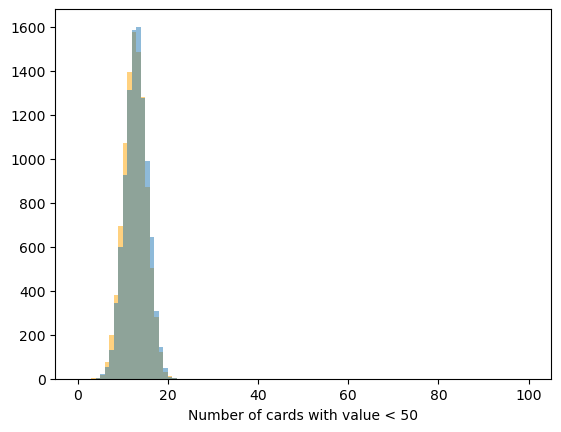

In [12]:
# Probability space is the rules of cards in the game

# In this code, we create a Binomial Distibution by summing 
# a Bernoulli distribution over all cards that were delt.
# Specifically, cards that falls below a certain threshold 
# (given by p*n) are considered "successes" and the total 
# number of these cards is added

N = 100
n = 5
k = 5
p = .5  

# Summing bernouli trials to make a binomial 
def sample_game(N,n,k,p,replacement=True):
    cards = sample_cards(N, n, k, replacement=replacement)
    total = 0
    sucess = 0
    for card in cards.flatten():
        if card  < N*p:
            sucess += 1
    return sucess

def binomial(N,n,k,replacement=True):
    trials = []
    for i in range(0,10000):
        sample = sample_game(N,n,k,p,replacement)
        trials.append(sample)


    a = plt.hist(trials,bins=range(0,N+1),color="orange",alpha=0.5)

    # c is the total number of bernouli trials summed in each binomial
    c = n*k
    s = np.random.binomial(c, p, 10000)

    plt.hist(s,bins=range(0,N+1),alpha=0.5)
    
binomial(N,n,k)
plt.xlabel("Number of cards with value < 50")
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. Although here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

Order statistic is kth smallest value

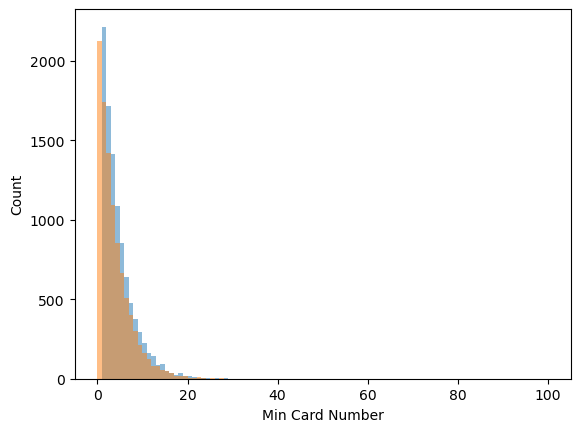

In [13]:
# We are doing first order statistic, so k = 1
N = 100
n = 5
k = 5

def beta(N,n,k,replacement=True):
    # Creating a beta distribution
    beta = np.random.beta(1, n*k, size=10000)

    # Multiplying by N to scale to our experiment
    beta = beta*N 

    lowest = []

    for i in range(0,10000):
        cards = sample_cards(N, n, k, replacement)
        lowest.append(np.min(cards))

    plt.hist(lowest,range(0,N+1),alpha=0.5)
    plt.hist(beta, range(0,N+1),alpha=0.5)

beta(N,n,k)
plt.xlabel("Min Card Number")
plt.ylabel("Count")
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

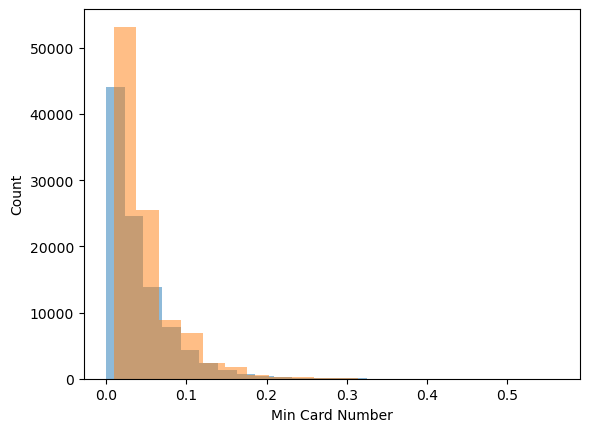

In [14]:
# We are doing first order statistic, so k = 1
N = 100
n = 5
k = 5

def exp(N,n,k,replacement=True):
    #scale is 1/b_beta_dist
    exp = np.random.exponential(scale=1/(n*k), size=100000)

    Xs = []

    for i in range(0,100000):
        cards = sample_cards(N, n, k,replacement)
        X = -np.log(1-np.min(cards)/N) #Natural log
        Xs.append(X)

    plt.hist(exp,bins=20,alpha=0.5)
    plt.hist(Xs,bins=20,alpha=0.5)

exp(N,n,k)
plt.xlabel("Min Card Number")
plt.ylabel("Count")
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

**When n*k << N, the differences between the two sampling strategies get smaller. This can be seen visually in the plots below, or when manually looking at the means of the two distributions. The mean with replacement is initially lower, but as N gets larger, it approaches to the mean without replacement**

Mean when n*k=N with replacement 11.979
Mean when n*k=N without replacement 12.0
Mean when n*k<N with replacement 12.144
Mean when n*k<N without replacement 12.022
Mean when n*k<<N with replacement 12.416
Mean when n*k<<N without replacement 12.692


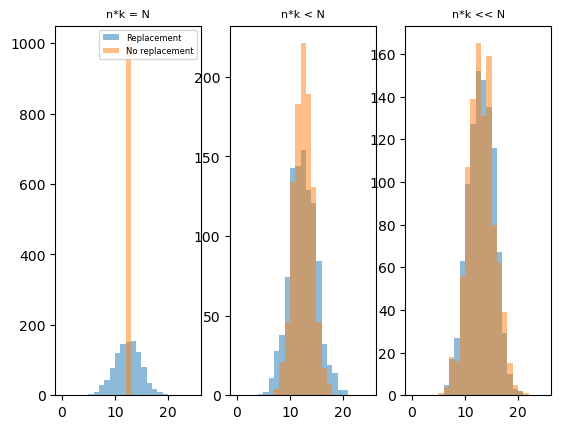

In [54]:
# In Binomial Distribution


fig, axs = plt.subplots(nrows=1, ncols=3)

# Without replacement is orange
axs[0].hist([sample_game(25, 5, 5,0.5,True) for i in range(1000)],bins=range(0,25+1),alpha=0.5,label="Replacement")
axs[0].hist([sample_game(25, 5, 5,0.5,False) for i in range(1000)],bins=range(0,25+1),alpha=0.5,label="No replacement")
axs[0].set_title("n*k = N",fontsize=8)
axs[0].legend(fontsize=6)

axs[1].hist([sample_game(50, 5, 5,0.5,True) for i in range(1000)],bins=range(0,25+1),alpha=0.5,label="Replacement")
axs[1].hist([sample_game(50, 5, 5,0.5,False) for i in range(1000)],bins=range(0,25+1),alpha=0.5,label="No replacement")
axs[1].set_title("n*k < N",fontsize=8)

axs[2].hist([sample_game(3000, 5, 5,0.5,True) for i in range(1000)],bins=range(0,25+1),alpha=0.5,label="Replacement")
axs[2].hist([sample_game(3000, 5, 5,0.5,False) for i in range(1000)],bins=range(0,25+1),alpha=0.5,label="No replacement")
axs[2].set_title("n*k << N",fontsize=8)

# Also looked at means
print("Mean when n*k=N with replacement",np.mean([sample_game(25, 5, 5,0.5,True) for i in range(1000)]))
print("Mean when n*k=N without replacement",np.mean([sample_game(25, 5, 5,0.5,False) for i in range(1000)]))

print("Mean when n*k<N with replacement",np.mean([sample_game(50, 5, 5,0.5,True) for i in range(1000)]))
print("Mean when n*k<N without replacement",np.mean([sample_game(50, 5, 5,0.5,False) for i in range(1000)]))

print("Mean when n*k<<N with replacement",np.mean([sample_game(3000, 5, 5,0.5,True) for i in range(1000)]))
print("Mean when n*k<<N without replacement",np.mean([sample_game(3000, 5, 5,0.5,False) for i in range(1000)]))


### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Matthew Giammar
- Member No2: Mara Baylis
- Member No3: